<a href="https://colab.research.google.com/github/JoshiRawr/CCADMACL_EXERCISES_COM231ML/blob/main/Exercise_1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


In [3]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [4]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [5]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [6]:
df.shape

(200, 5)

Show summary statistics using `describe()`. `(5 pts)`

In [7]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [8]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [13]:
features = df[['AnnualIncome', 'SpendingScore']]

Display the first 10 rows. `(5 pts)`

In [14]:
features.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

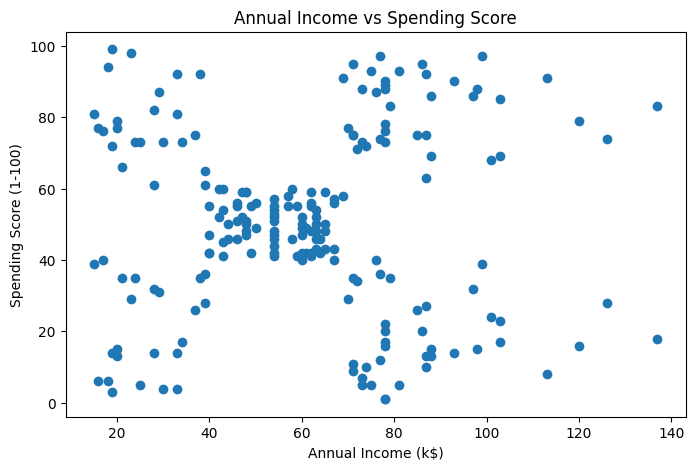

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

For cluster = 1, SSE/WCSS is 269981.28000000014
For cluster = 2, SSE/WCSS is 183653.3289473683
For cluster = 3, SSE/WCSS is 106348.37306211119
For cluster = 4, SSE/WCSS is 73880.64496247198
For cluster = 5, SSE/WCSS is 44448.45544793369
For cluster = 6, SSE/WCSS is 40825.16946386947
For cluster = 7, SSE/WCSS is 33642.57922077922
For cluster = 8, SSE/WCSS is 26686.837785187785
For cluster = 9, SSE/WCSS is 24766.471609793436
For cluster = 10, SSE/WCSS is 23103.122085983905


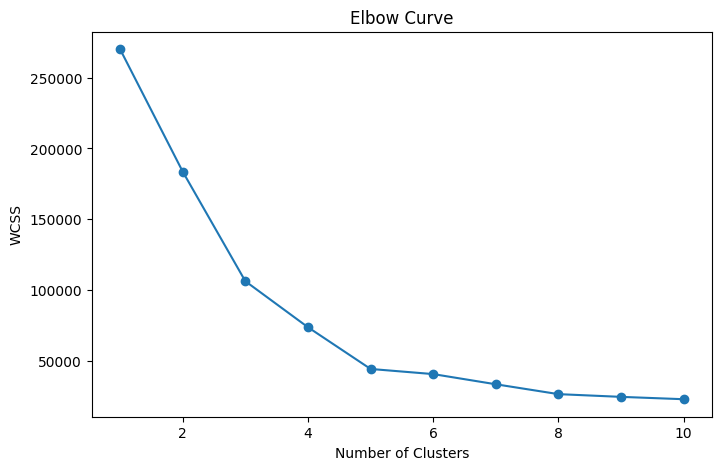

In [21]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(features)
    wcss.append(model.inertia_)
    print("For cluster = {}, SSE/WCSS is {}".format(k, model.inertia_))

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Curve")
plt.show()

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)
df.head(10)


,CustomerID,Genre,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
5,6,Female,22,17,76,2
6,7,Female,35,18,6,4
7,8,Female,23,18,94,2
8,9,Male,64,19,3,4
9,10,Female,30,19,72,2


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

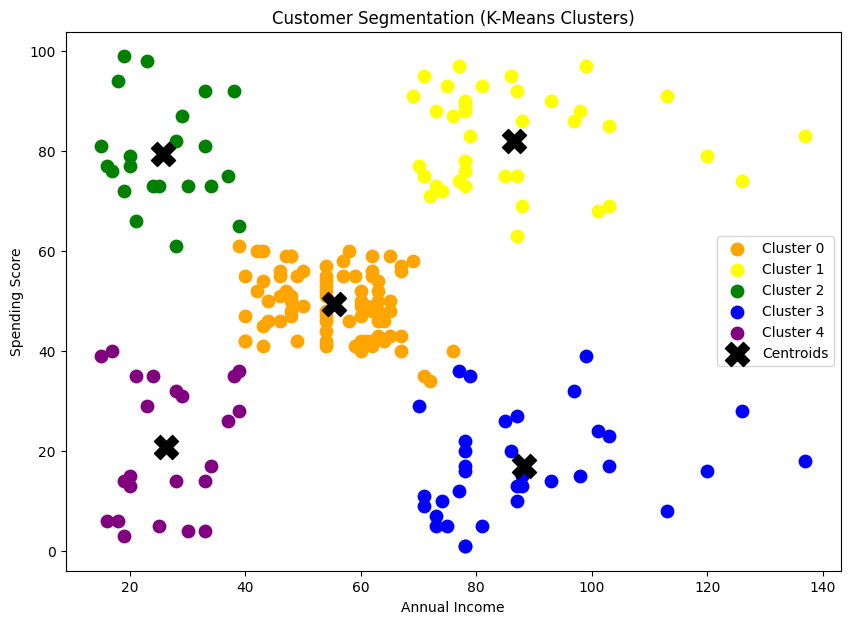

In [36]:
import matplotlib.pyplot as plt

colors = ['orange', 'yellow', 'green', 'blue', 'purple']

plt.figure(figsize=(10,7))


for cluster in range(5):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['AnnualIncome'],
                cluster_points['SpendingScore'],
                color=colors[cluster],
                label=f'Cluster {cluster}',
                s=80)


centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],
            c='red, s=300, marker='X', label='Centroids')

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation (K-Means Clusters)")
plt.legend()
plt.show()


## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

1. Which cluster represents high income, low spending users?

answer:

Cluster 3 (blue)

High Annual Income

Low Spending Score

Located in the bottom-right of your plot.


2. Which cluster represents low income, high spending users?

answer:

Cluster 2 (green)

Low Annual Income

High Spending Score

Located in the top-left of your plot.


3. Which cluster might represent target customers for promotions?

answer:

Cluster 1 (yellow) — High income + high spending

These customers already spend a lot.

Ideal for premium promotions, loyalty programs, VIP offers.

4. What business insights can you derive from the clusters?

answer:

*   Customers form five clear behavioral groups with different income and spending habits.

*   High-income low-spenders (blue) can be motivated to spend more with targeted promotions.

*   Low-income high-spenders (green) respond well to deals, discounts, and budget-friendly campaigns.

*   High-income high-spenders (yellow) are great candidates for premium products and loyalty rewards.

*   Middle-income moderate-spenders (orange) represent stable, average mall customers.

*   Low-income low-spenders (purple) are least likely to respond strongly to promotions.

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [27]:
from mpl_toolkits.mplot3d import Axes3D

features3d = df[['Age', 'AnnualIncome', 'SpendingScore']]

kmeans3d = KMeans(n_clusters=5, random_state=42)
df['Cluster3D'] = kmeans3d.fit_predict(features3d)


Visualize using a 3D scatter plot. `(5 pts)`

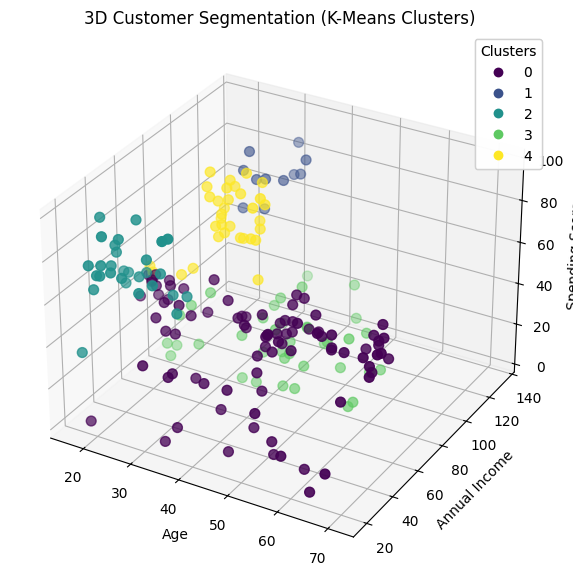

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Age'], df['AnnualIncome'], df['SpendingScore'],
                     c=df['Cluster3D'], cmap='viridis', s=50)


ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

ax.set_xlim(df['Age'].min() - 5, df['Age'].max() + 5)
ax.set_ylim(df['AnnualIncome'].min() - 5, df['AnnualIncome'].max() + 5)
ax.set_zlim(df['SpendingScore'].min() - 5, df['SpendingScore'].max() + 5)

ax.set_title('3D Customer Segmentation (K-Means Clusters)')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper right')
ax.add_artist(legend1)

plt.show()


## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

1. Answer:

Yes. Adding Age to Annual Income and Spending Score creates clusters that are more meaningful and better separated. Age adds an important behavioral dimension, which helps to distinguish customer groups more clearly, such as younger high spenders, middle-aged moderate spenders, and older conservative spenders.

2. Answer:



*  Age affects spending patterns strongly; younger customers tend to spend more regardless of income.
*   Older customers often have lower spending scores despite income levels.


*   You can target younger customers with high spending for luxury items.






